# <center>DATA.ML.200 Pattern Recognition and Machine Learning<br />Md. Abdullah-Al Mamun</center> 
# <center>Exercise 5</center> 

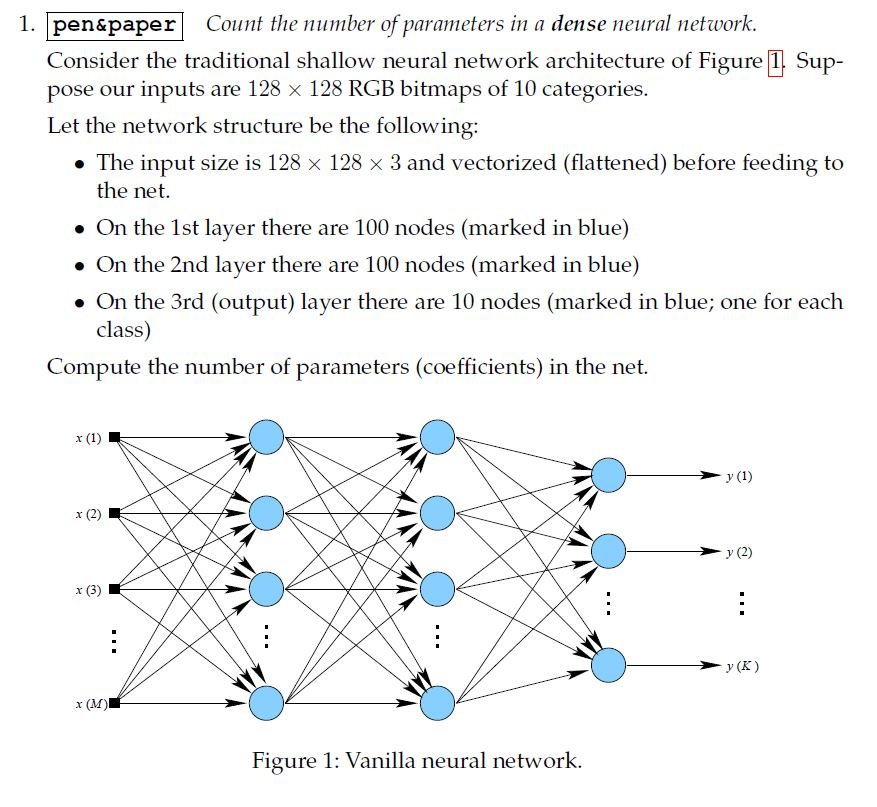
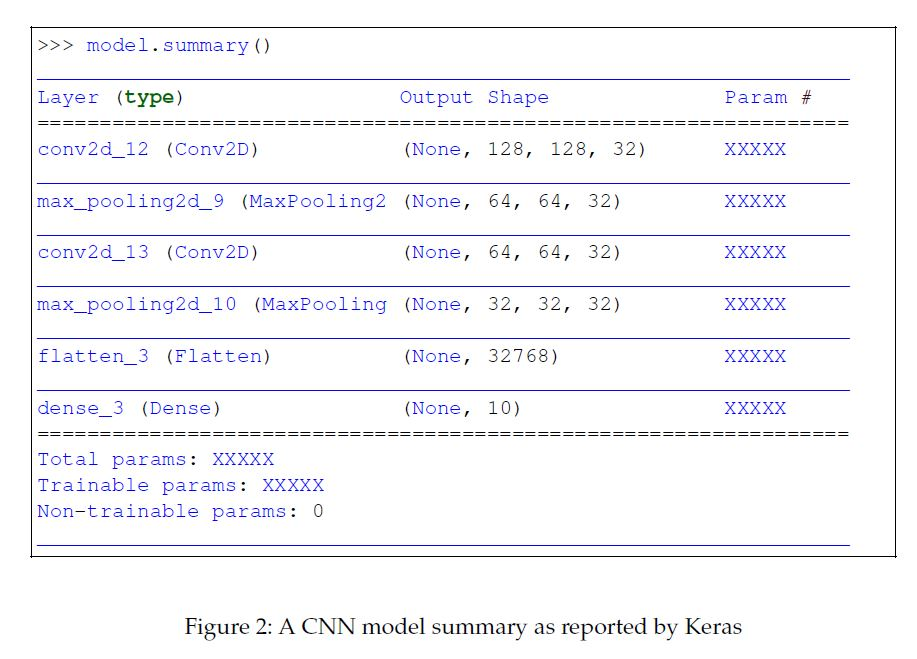

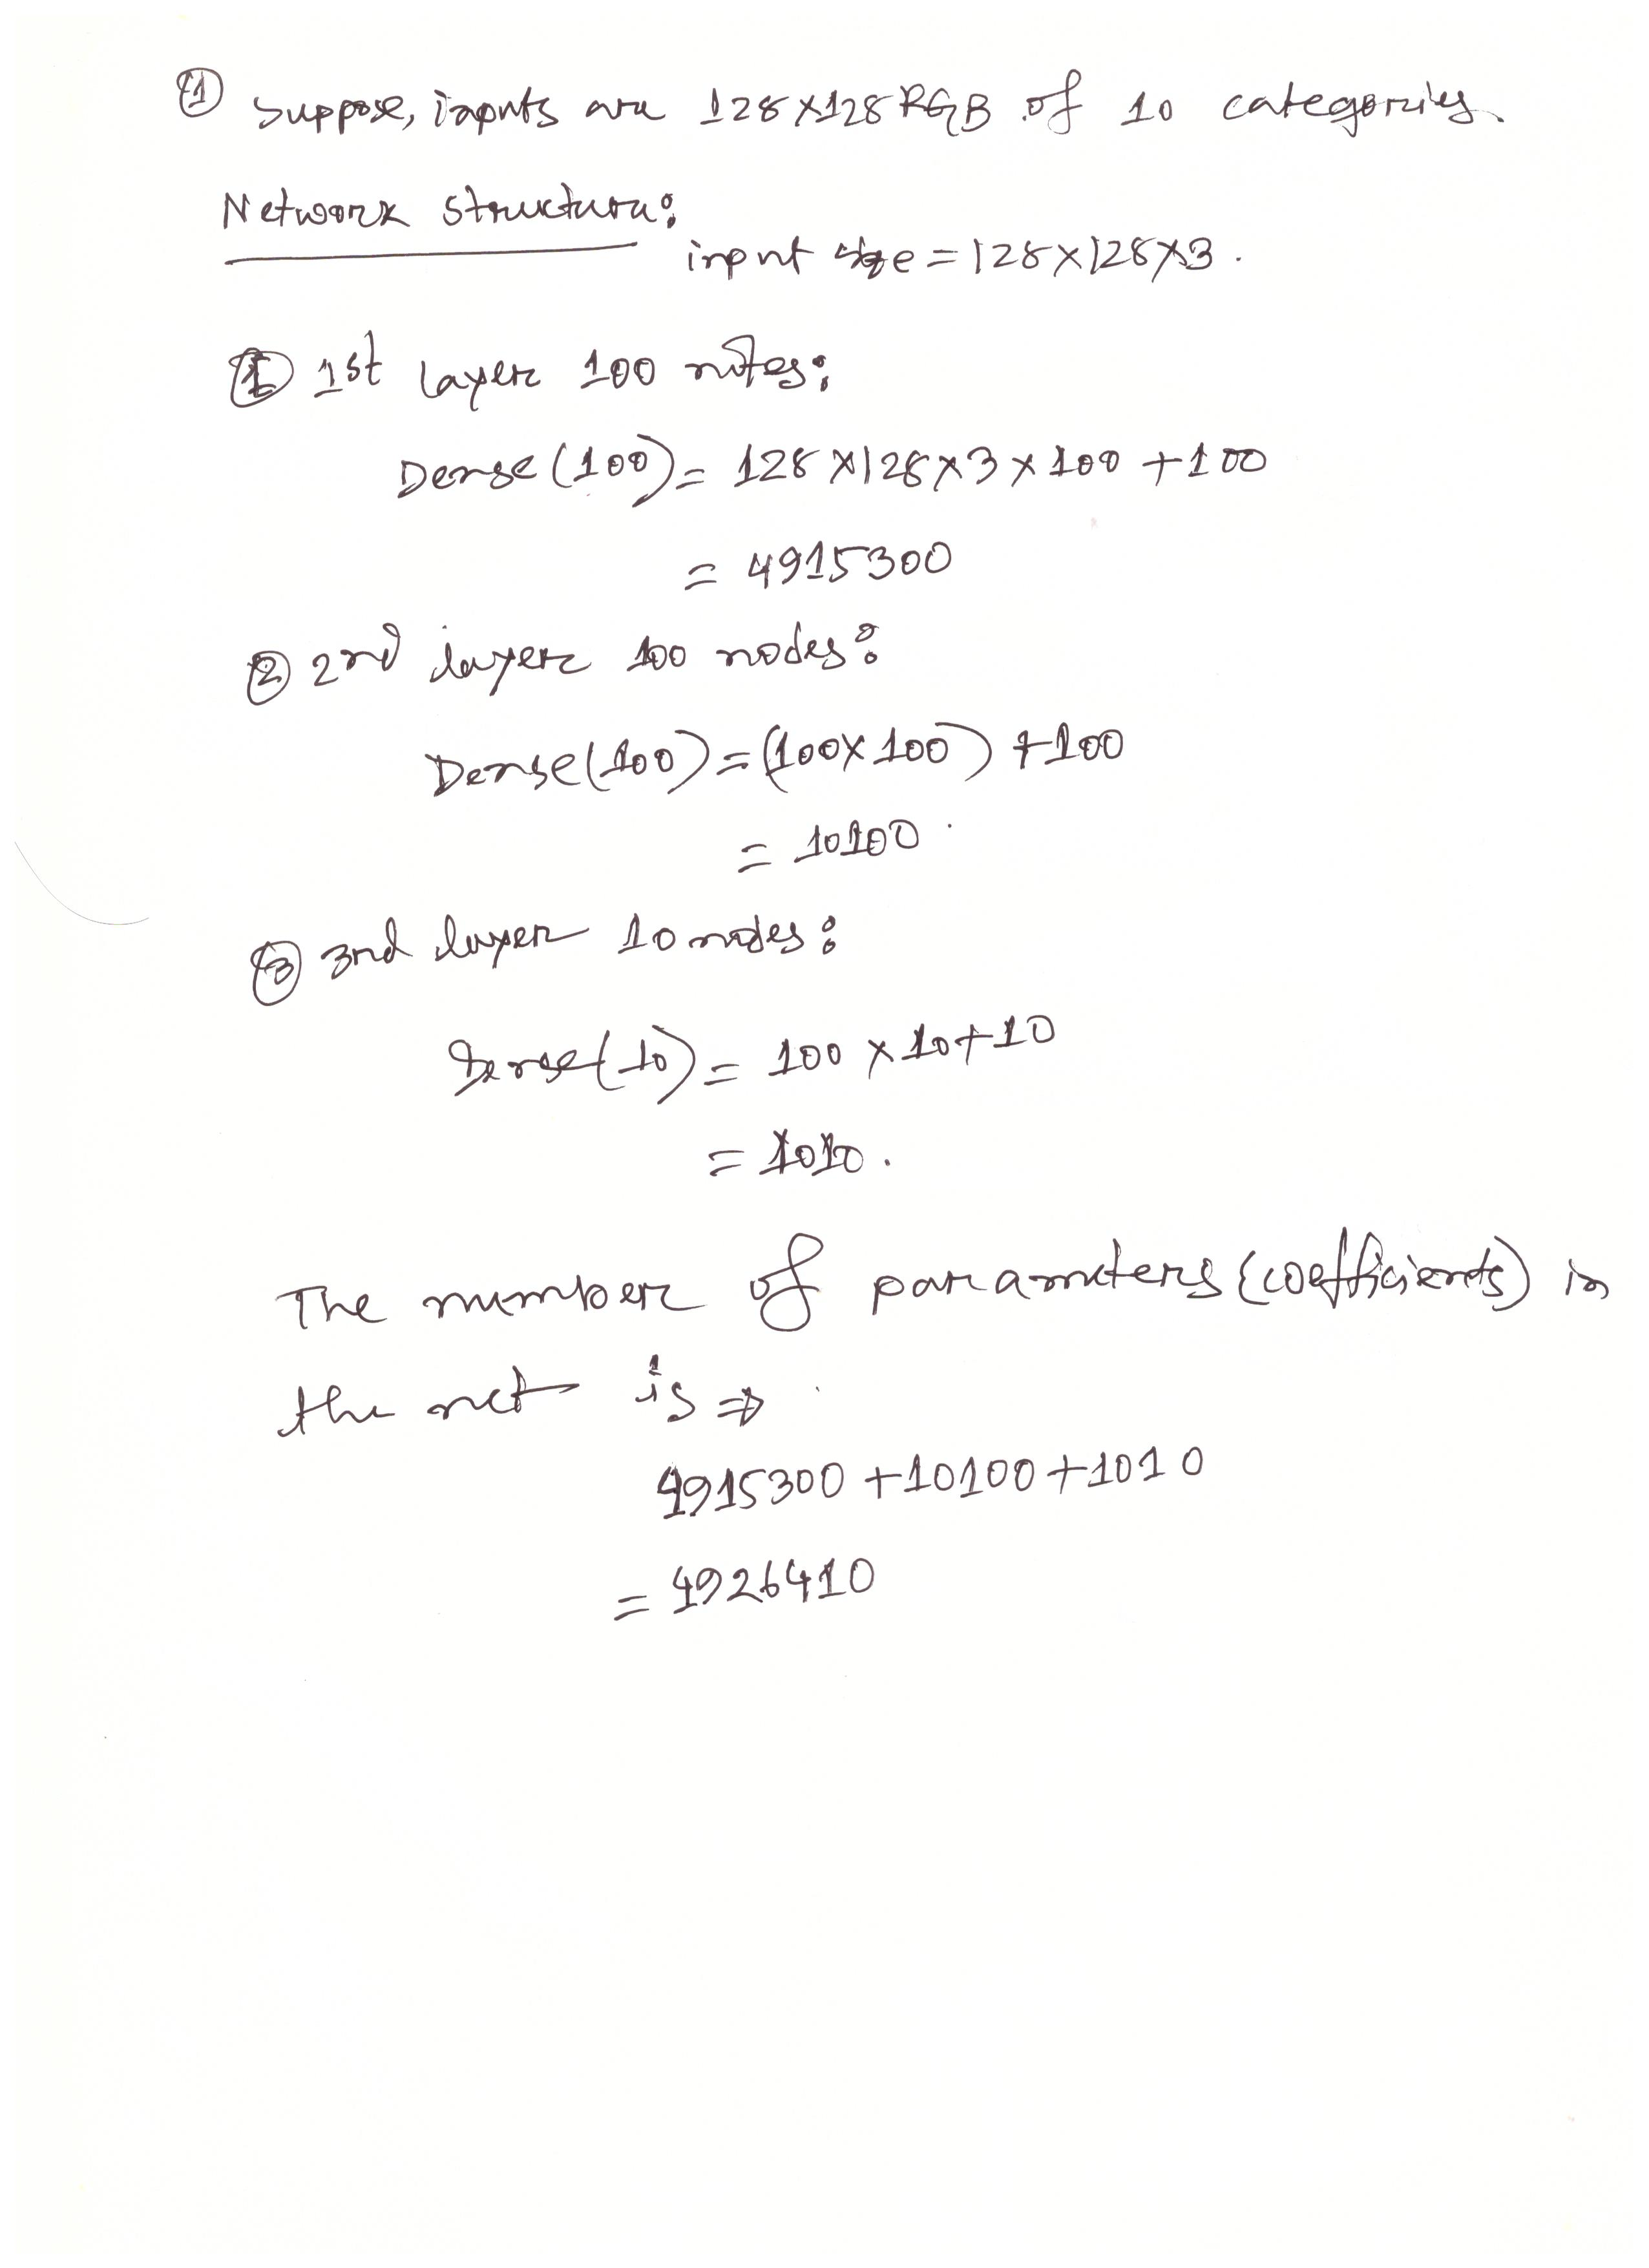

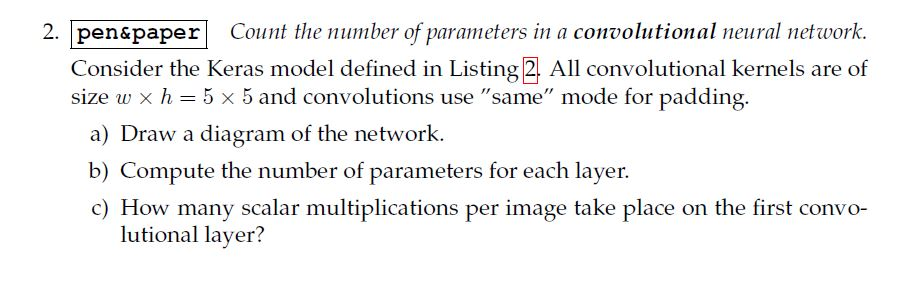


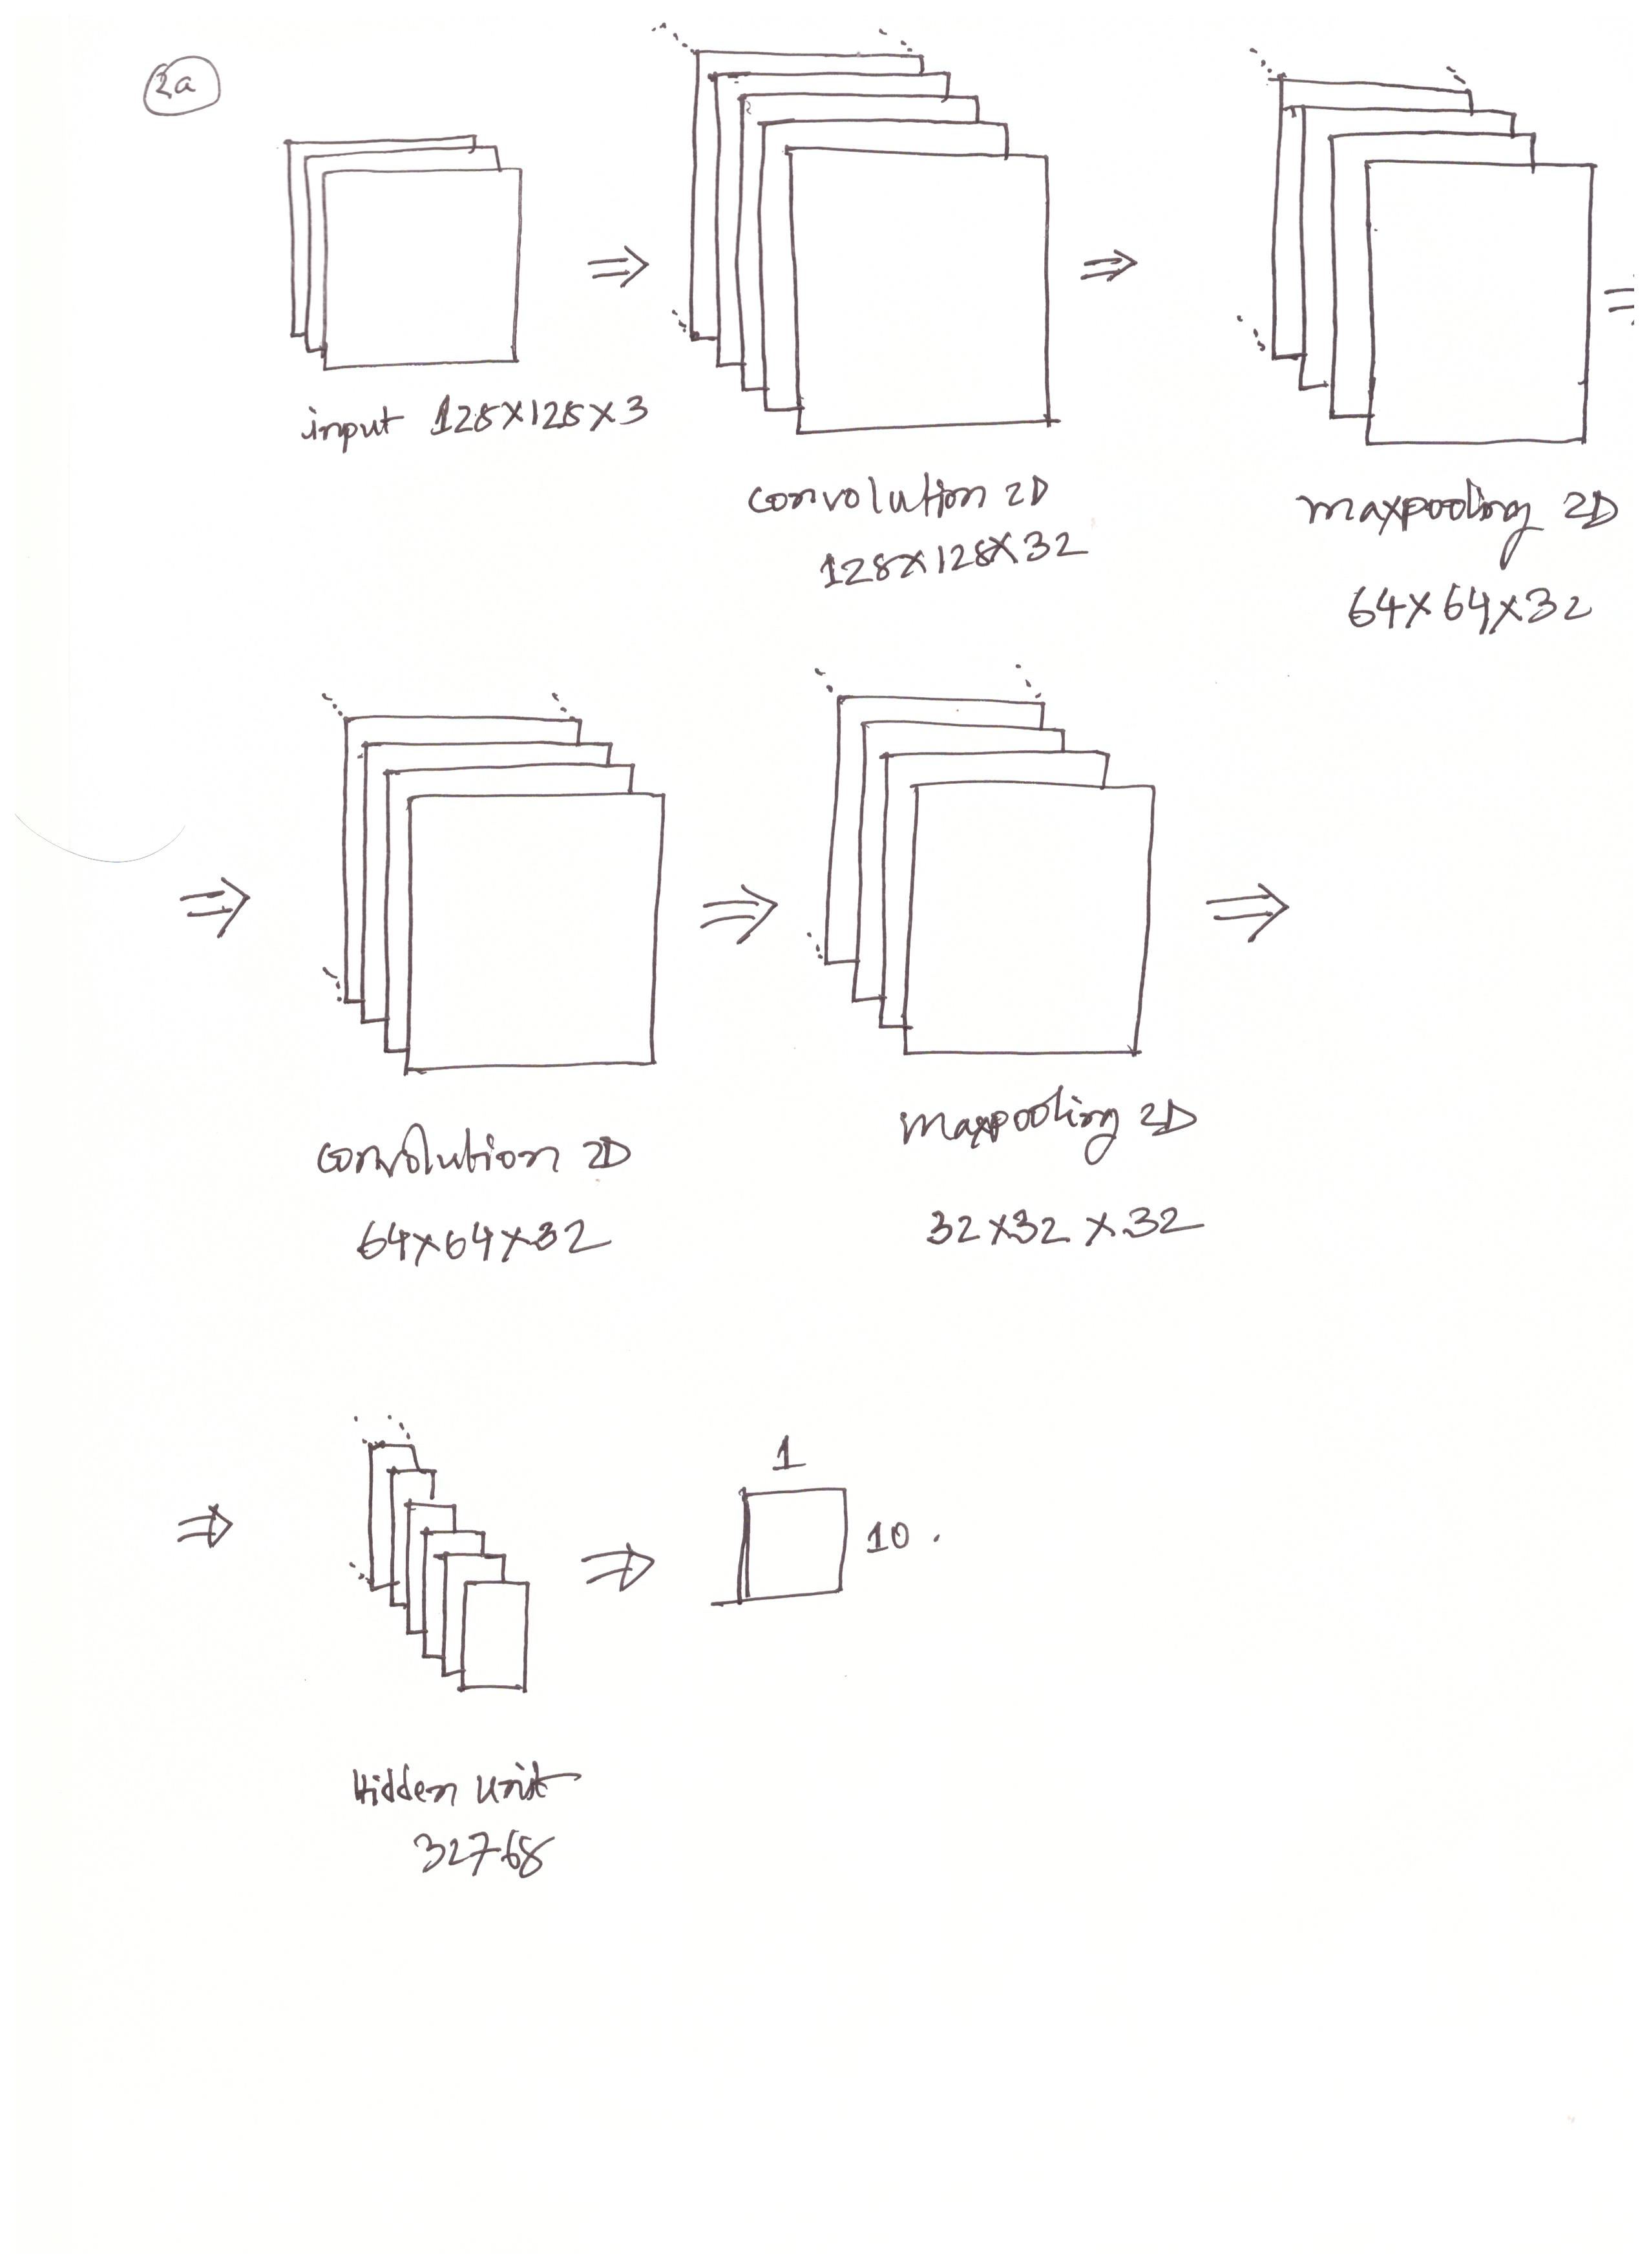


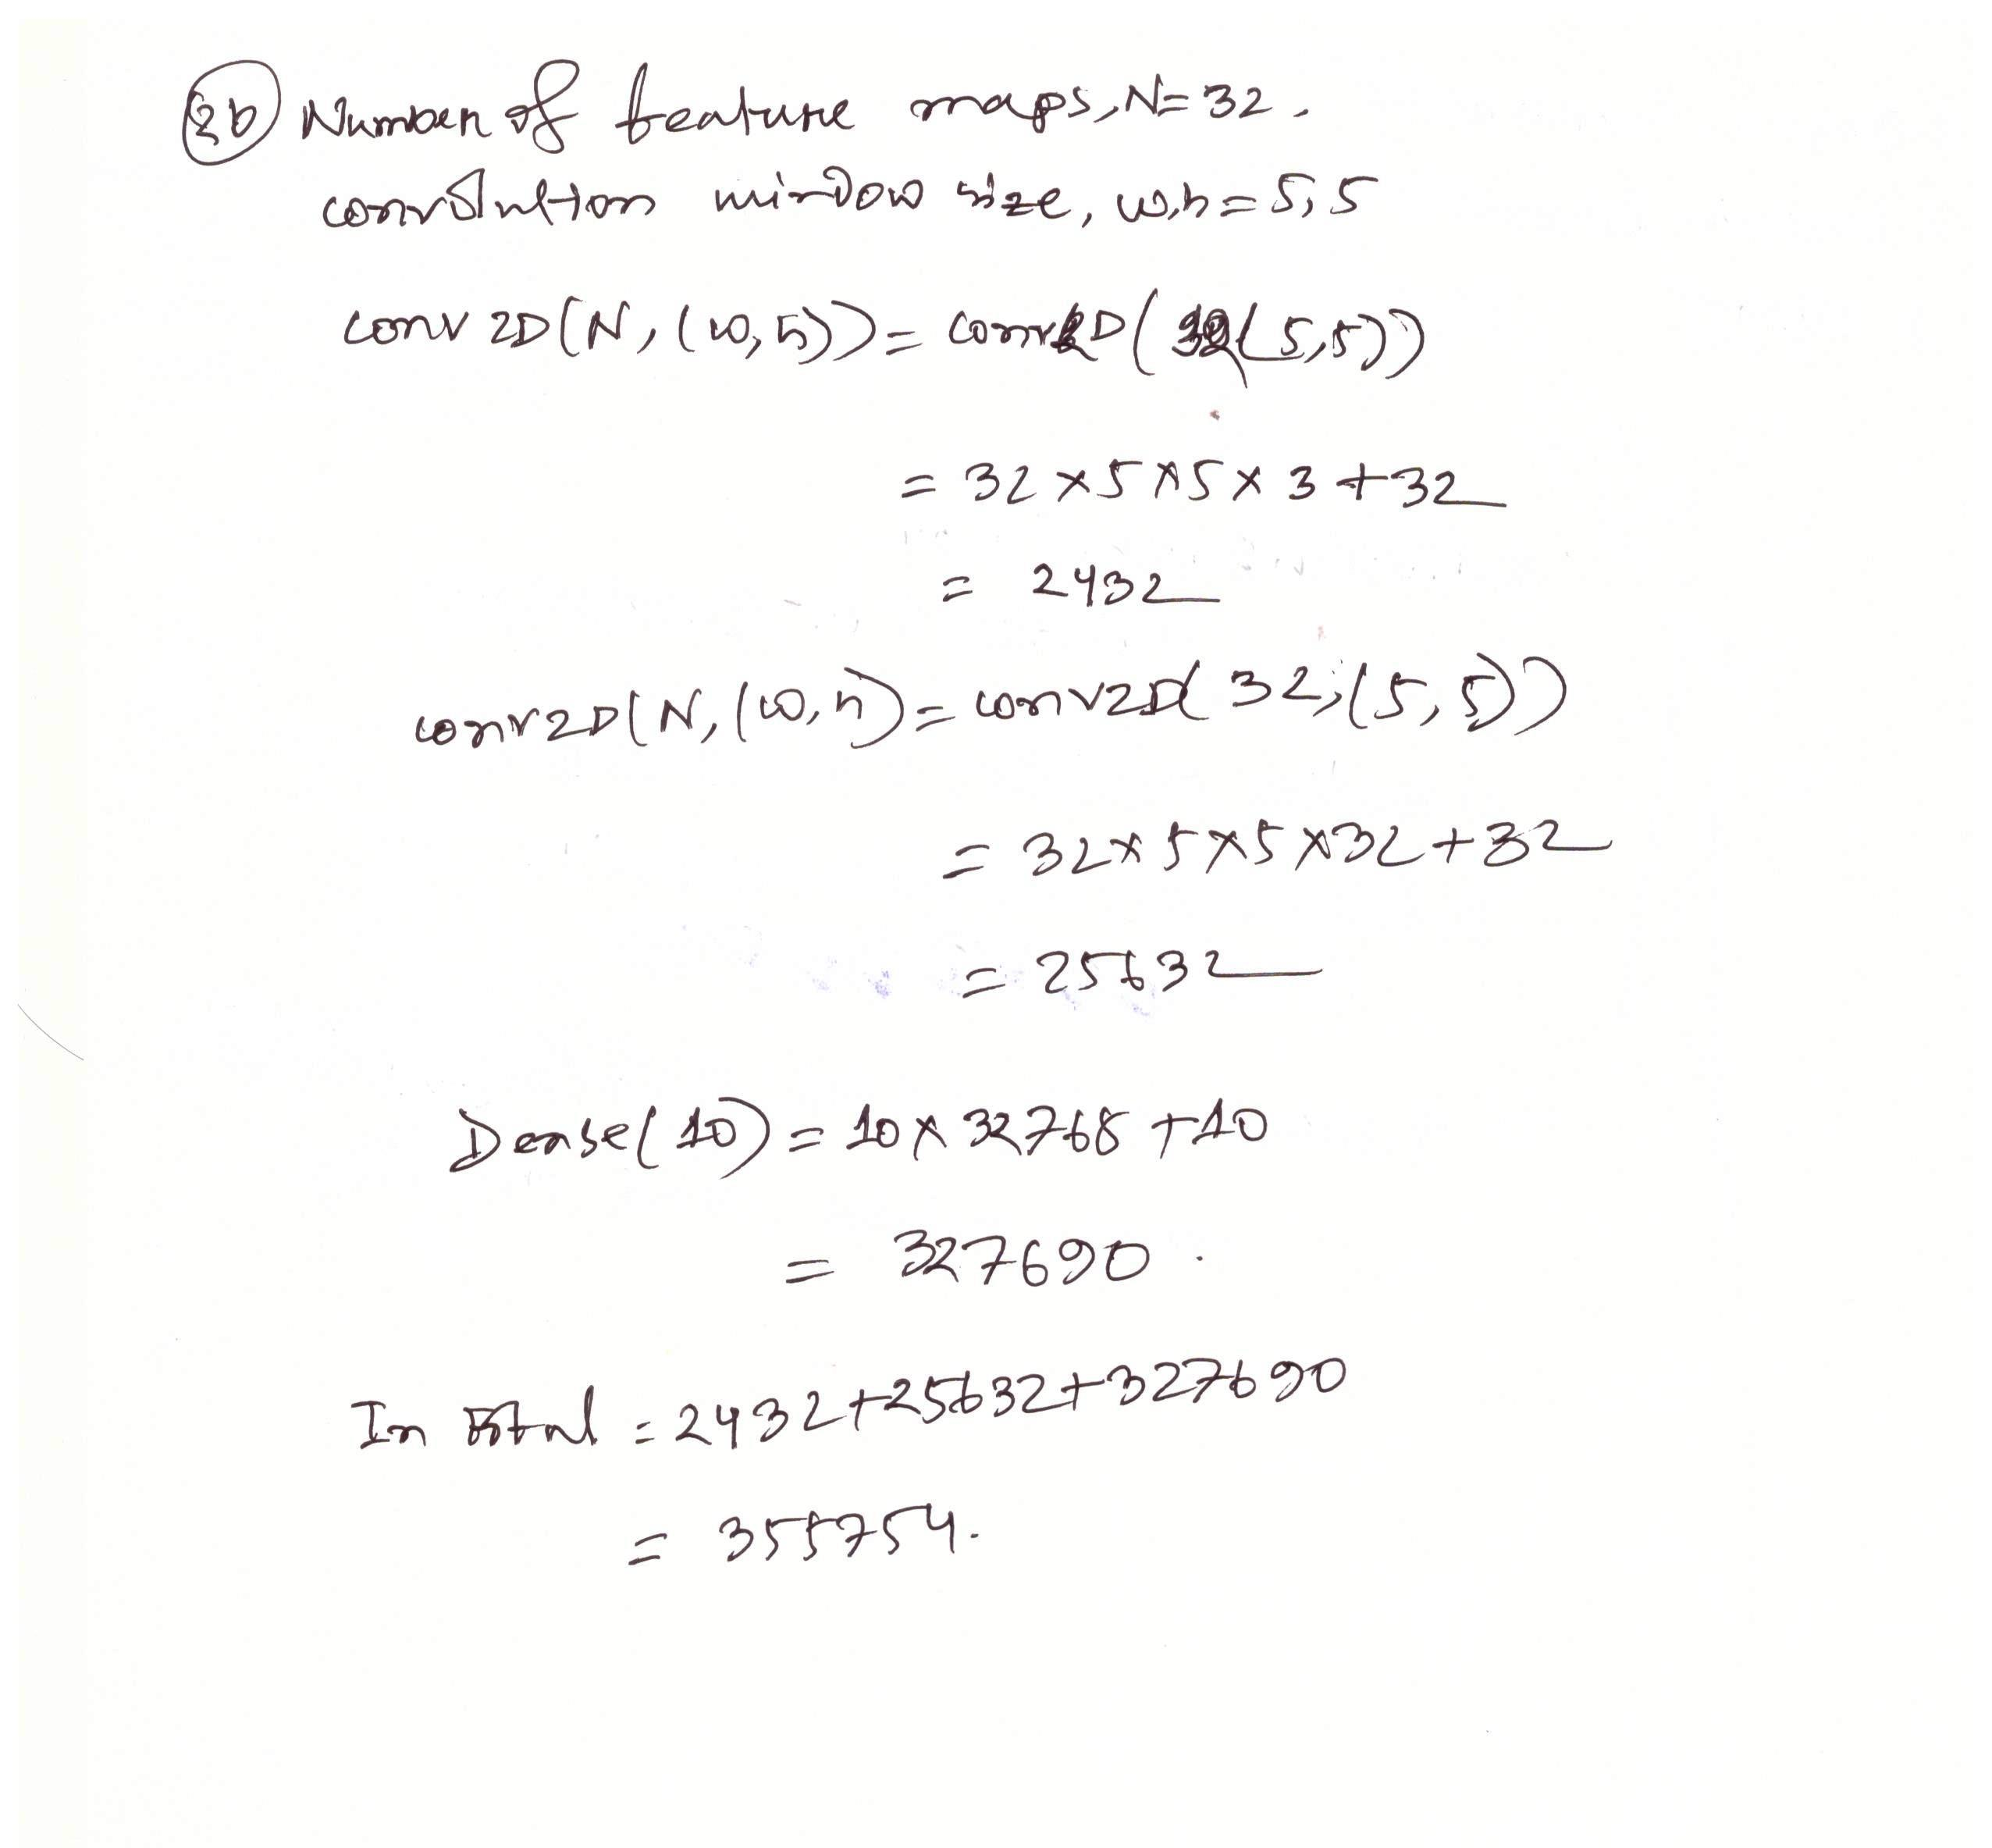


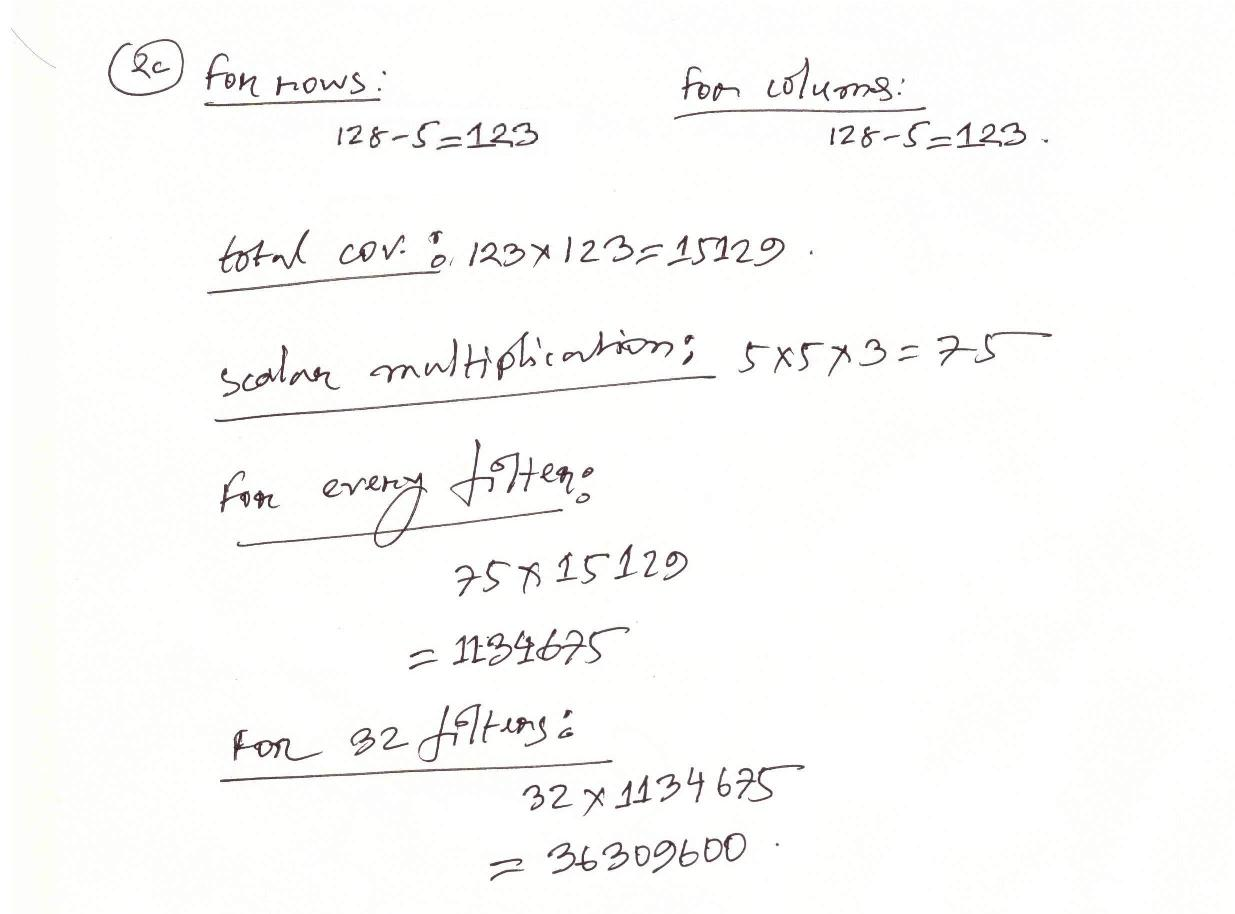

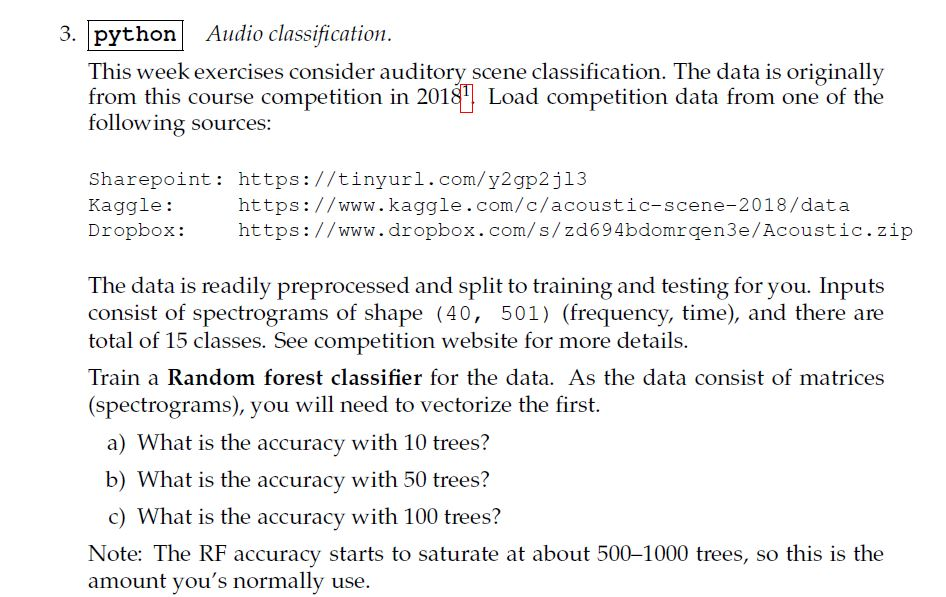

In [1]:
# loading compressed file and retrieve training and test data

import numpy as np

np.savez_compressed('Acoustic')
trainX=np.load("X_train.npy")
trainy=np.load("y_train.npy")
testX=np.load("X_test.npy")
testy=np.load("y_test.npy")

In [6]:
from sklearn.ensemble import*
import time
from sklearn.datasets import*
from sklearn.model_selection import*


trees=[10,50,100]

for i in trees:
    starting_time=time.time()
    
    randomForestCl=RandomForestClassifier(n_estimators=i)
    
    # fitiing  the model
    randomForestCl.fit(trainX.reshape((trainX.shape[0],-1)),trainy)

    score= randomForestCl.score(testX.reshape((testX.shape[0],-1)),testy)
    
    new_time=time.time()-starting_time    
     # printing the accuracy score, taken time and number of trees
    print("Accuracy: {:0.2f} , Time: {:0.2f} s for {} trees".format(score,new_time,i ))


Accuracy: 0.53 , Time: 4.34 s for 10 trees
Accuracy: 0.59 , Time: 20.77 s for 50 trees
Accuracy: 0.61 , Time: 42.84 s for 100 trees


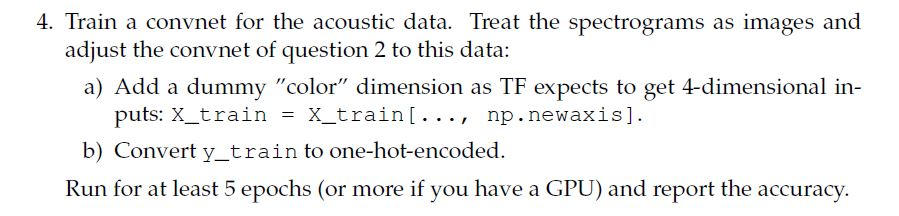

In [8]:
from keras.applications import*
from keras.models import*
from keras.layers import*

# Keras Conv2D and Convolutional Layers

keras_model=Sequential()

keras_model.add(Conv2D(32,(5,5), input_shape=(40,501,1), padding="same", activation='relu'))
keras_model.add(MaxPooling2D(pool_size=(2,2)))

keras_model.add(Conv2D(32,(5,5), padding="same",activation='relu'))
keras_model.add(MaxPooling2D(pool_size=(2,2)))

keras_model.add(Flatten())
keras_model.add(Dense(15, activation='softmax'))

keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 501, 32)       832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 250, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 250, 32)       25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 125, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 15)                600015    
Total params: 626,479
Trainable params: 626,479
Non-trainable params: 0
__________________________________________________

In [9]:
from tensorflow.keras.utils import*
from keras.models import*
from keras.layers import*

keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

keras_model.fit(trainX[...,np.newaxis], to_categorical(trainy), epochs=50)

Epoch 1/50
141/141 [==============================] - 63s 449ms/step - loss: 2.9957 - accuracy: 0.0987
Epoch 2/50
141/141 [==============================] - 65s 464ms/step - loss: 2.1412 - accuracy: 0.2333
Epoch 3/50
141/141 [==============================] - 64s 451ms/step - loss: 1.8201 - accuracy: 0.3476
Epoch 4/50
141/141 [==============================] - 64s 456ms/step - loss: 1.6827 - accuracy: 0.4080
Epoch 5/50
141/141 [==============================] - 64s 455ms/step - loss: 1.4687 - accuracy: 0.5013
Epoch 6/50
141/141 [==============================] - 64s 457ms/step - loss: 1.1190 - accuracy: 0.6156
Epoch 7/50
141/141 [==============================] - 68s 479ms/step - loss: 1.0802 - accuracy: 0.6333
Epoch 8/50
141/141 [==============================] - 67s 478ms/step - loss: 0.9253 - accuracy: 0.6809
Epoch 9/50
141/141 [==============================] - 65s 461ms/step - loss: 0.8379 - accuracy: 0.7082
Epoch 10/50
141/141 [==============================] - 65s 463ms/step - l

In [10]:
# Evaluating the model on the test data using `evaluate`

res=keras_model.evaluate(testX[...,np.newaxis],to_categorical(testy))

tstacc=res[1]*100
print("Test Accuracy: {:0.3f} %".format(tstacc))

47/47 [==============================] - 4s 79ms/step - loss: 3.1139 - accuracy: 0.5907
Test Accuracy: 59.067 %


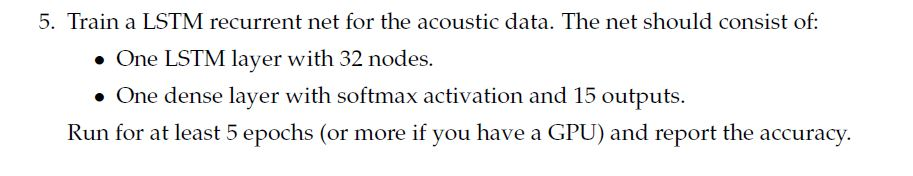

In [11]:
from keras.applications import*
from keras.models import*
from keras.layers import*

seq_model=Sequential()

seq_model.add(LSTM(32,input_shape=(501,40))) 
seq_model.add(Dense(15,activation='softmax'))

seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                9344      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                495       
Total params: 9,839
Trainable params: 9,839
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.utils import*
from keras.models import*
from keras.layers import*

def tfrequncy(feq):  
    
    a,b,c=feq.shape
    xzeros=np.zeros((a,c,b))
    
    for i in range(a):
        xzeros[i,:,:]=feq[i,:,:].T
        
    return xzeros

seq_model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])

seq_model.fit(tfrequncy(trainX),to_categorical(trainy), epochs=50)

Epoch 1/50
141/141 [==============================] - 12s 82ms/step - loss: 1.1858 - accuracy: 0.5904
Epoch 2/50
141/141 [==============================] - 12s 85ms/step - loss: 1.1594 - accuracy: 0.5953
Epoch 3/50
141/141 [==============================] - 12s 83ms/step - loss: 1.1412 - accuracy: 0.6049
Epoch 4/50
141/141 [==============================] - 12s 83ms/step - loss: 1.1518 - accuracy: 0.6024
Epoch 5/50
141/141 [==============================] - 12s 85ms/step - loss: 1.1277 - accuracy: 0.6104
Epoch 6/50
141/141 [==============================] - 12s 86ms/step - loss: 1.1222 - accuracy: 0.6080
Epoch 7/50
141/141 [==============================] - 12s 83ms/step - loss: 1.1187 - accuracy: 0.6131
Epoch 8/50
141/141 [==============================] - 12s 84ms/step - loss: 1.1221 - accuracy: 0.6144
Epoch 9/50
141/141 [==============================] - 12s 84ms/step - loss: 1.1048 - accuracy: 0.6060
Epoch 10/50
141/141 [==============================] - 12s 85ms/step - loss: 1.139

In [19]:
# Evaluating the model on the test data using `evaluate`
res=seq_model.evaluate(tfrequncy(testX),to_categorical(testy))

tstacc=res[1]*100
print("Test Accuracy: {:0.2f} %".format(tstacc))

47/47 [==============================] - 1s 22ms/step - loss: 1.3839 - accuracy: 0.5480
Test Accuracy: 54.80 %
